In [77]:
%reload_ext autoreload

%autoreload 2


In [78]:
input_file = "../../test_data/system_tests/Spectronaut_SmallFC/20210624_120140_MP-DIA-multi-organis_Report_smallfc_COMPLETE.tsv.zip.spectronaut_fragion_isotopes.aq_reformat.tsv"
directlfq_file = "../../test_data/system_tests/Spectronaut_SmallFC/20210624_120140_MP-DIA-multi-organis_Report_smallfc_COMPLETE.tsv.zip.spectronaut_fragion_isotopes.aq_reformat.tsv.protein_intensities.tsv"

spectronaut_protein_intensities = "../../test_data/system_tests/Spectronaut_SmallFC/20210624_120140_MP-DIA-multi-organis_Report_smallfc_COMPLETE.tsv.zip.spectronaut_protein.aq_reformat.tsv"
maxDIA_protein_intensities = "../../test_data/system_tests/Spectronaut_SmallFC/maxdia_reprocessing/proteinGroups.txt"


protein_mapping_file = "../../test_data/system_tests/Spectronaut_SmallFC/protein_species_map.tsv"
samplemap = "../../test_data/system_tests/Spectronaut_SmallFC/samples.map.tsv"
samplemap_maxdia = "../../test_data/system_tests/Spectronaut_SmallFC/maxdia_reprocessing/samplemap.tsv"

run_directlfq = False

In [79]:
if run_directlfq:
    import directlfq.lfq_manager as lfqmgr

    lfqmgr.run_lfq(input_file=input_file)



In [80]:
import directlfq.benchmarking as lfqbenchmark
import directlfq.utils as lfqutils

samplemap_df = lfqutils.load_samplemap(samplemap)
samples_used = lfqutils.get_samples_used_from_samplemap_df(samplemap_df, cond1="S1", cond2="S2")
samples_used_maxdia = lfqutils.get_samples_used_from_samplemap_file(samplemap_maxdia, cond1="S1", cond2="S2")

restable_directlfq = lfqbenchmark.ResultsTableDirectLFQ(input_file=directlfq_file, input_name="directLFQ", samples_c1=samples_used[0], samples_c2=samples_used[1])
restable_spectronaut = lfqbenchmark.ResultsTableDirectLFQ(input_file=spectronaut_protein_intensities, input_name="Spectronaut", samples_c1=samples_used[0], samples_c2=samples_used[1])
restable_maxdia = lfqbenchmark.ResultsTableMaxQuant(input_file=maxDIA_protein_intensities, input_name="maxDIA", samples_c1=samples_used_maxdia[0], samples_c2=samples_used_maxdia[1])

/Users/constantin/workspace/directlfq/directlfq/benchmarking.py:151: RuntimeWarning: divide by zero encountered in log2
  self.formated_dataframe[self.log2fc_column] = [np.log2(x[0]) - np.log2(x[1]) for x in zip(self.formated_dataframe['median_intensity_c1'], self.formated_dataframe['median_intensity_c2'])]
/Users/constantin/workspace/directlfq/directlfq/benchmarking.py:151: RuntimeWarning: divide by zero encountered in log2
  self.formated_dataframe[self.log2fc_column] = [np.log2(x[0]) - np.log2(x[1]) for x in zip(self.formated_dataframe['median_intensity_c1'], self.formated_dataframe['median_intensity_c2'])]
/Users/constantin/workspace/directlfq/directlfq/benchmarking.py:151: RuntimeWarning: invalid value encountered in double_scalars
  self.formated_dataframe[self.log2fc_column] = [np.log2(x[0]) - np.log2(x[1]) for x in zip(self.formated_dataframe['median_intensity_c1'], self.formated_dataframe['median_intensity_c2'])]


In [81]:
organism_annotator_spectronaut_based = lfqbenchmark.OrganismAnnotatorSpectronaut(mapping_file=protein_mapping_file,protein_column="PG.ProteinGroups", organism_column="PG.Organisms")
organism_annotator_spectronaut_based.annotate_table_with_organism(restable_directlfq)
organism_annotator_spectronaut_based.annotate_table_with_organism(restable_spectronaut)

organism_annotator_maxDIA_based = lfqbenchmark.OrganismAnnotatorMaxQuant(mapping_file=maxDIA_protein_intensities)
organism_annotator_maxDIA_based.annotate_table_with_organism(restable_maxdia)

/Users/constantin/opt/anaconda3/envs/directLFQ/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/constantin/opt/anaconda3/envs/directLFQ/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/constantin/opt/anaconda3/envs/directLFQ/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


(-2.0, 2.0)

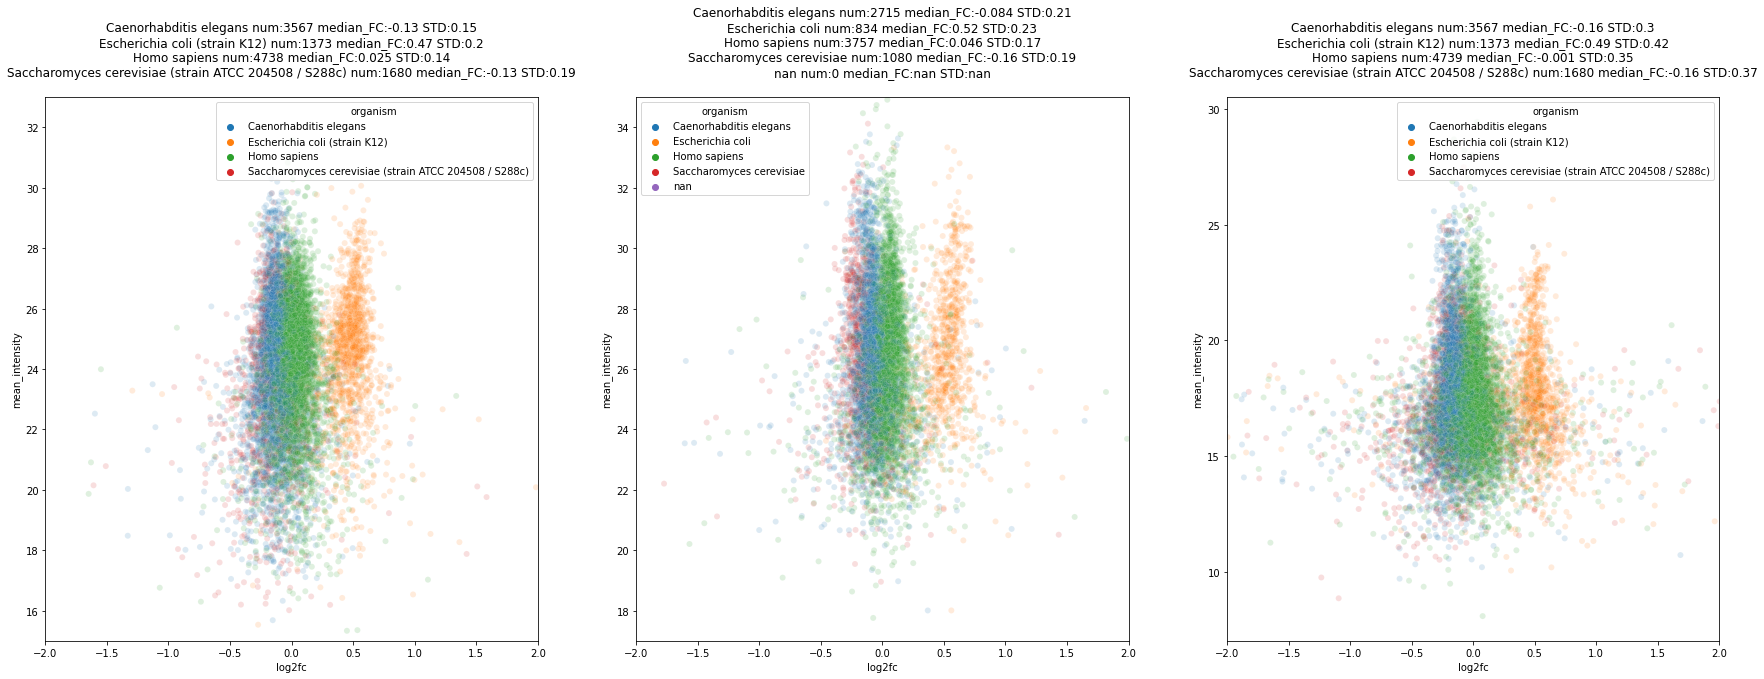

In [88]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3,figsize=(30,10))


fcplotter_directLFQ = lfqbenchmark.MultiOrganismIntensityFCPlotter(ax=axes[0], resultstable_w_ratios=restable_directlfq)

fcplotter_maxDIA = lfqbenchmark.MultiOrganismIntensityFCPlotter(ax=axes[1], resultstable_w_ratios=restable_maxdia)
fcplotter_spectronaut = lfqbenchmark.MultiOrganismIntensityFCPlotter(ax=axes[2], resultstable_w_ratios= restable_spectronaut)

axes[0].set_xlim([-2, 2])
axes[0].set_ylim([15, 33])
axes[1].set_xlim([-2, 2])
axes[1].set_ylim([17, 35])
axes[2].set_xlim([-2, 2])
